## 필요한 라이브러리 호출

In [1]:
import os
import io
import requests
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.v2 as v2
from torchsummary import summary
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image
from pathlib import Path

In [2]:
dataset = FashionMNIST('data', download=True, transform=v2.ToTensor())
dataset = CIFAR10('data', download=True, transform=v2.ToTensor())

C:\Users\dongh\anaconda3\envs\torch-book\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified


In [3]:
dataset.data.shape

(50000, 32, 32, 3)

In [4]:
data_loader = DataLoader(dataset, batch_size=64)

In [5]:
50000 / 64

781.25

In [6]:
for X_train, y_label in data_loader:
    print(X_train.shape, y_label.shape)
    break

torch.Size([64, 3, 32, 32]) torch.Size([64])


In [7]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 126, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(126 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

In [8]:
model = LeNet5()

In [9]:
color_image = torch.rand(64, 3, 32, 32)
model(color_image).shape

torch.Size([64, 10])

In [10]:
for X_train, y_label in data_loader:
    model(X_train)
    break

In [11]:
loss_fn = nn.CrossEntropyLoss()

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
for X_train, y_label in data_loader:
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_label)
    loss.backward()
    optimizer.step()
    break

In [14]:
dataset = MNIST('data', download=True, transform=v2.ToTensor())

In [15]:
data, label = dataset[0]
data.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [16]:
class MyDataset():
    def __init__(self, root='./data/dogs-vs-cats', transform=None):
        self.root = root
        self.image_paths = []
        self.__classes = {'Cat':0, 'Dog':1}
        self.labels = []

        for dname in os.listdir(self.root):
            print(type(dname))
            print(os.path.isdir(Path(root, dname)))
            new_path = Path(root, dname)
            if os.path.isdir(new_path):
                for file in os.listdir(new_path):
                    # print(file)
                    self.image_paths.append(str(Path(new_path, file)))
                    self.labels.append(self.__classes[dname])
                    
        self.transform = transform

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        # print(path)
        image = Image.open(path)
        # print(self.transform(image).shape)
        return self.transform(image), self.labels[idx]

    def __len__(self):
        return len(self.labels)

In [17]:
transform = v2.Compose([
            v2.RandomResizedCrop(size=(224,224), antialias=True),
            v2.ToTensor(),
            v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset = MyDataset('./data/dogs-vs-cats', transform)
data, label = dataset[0]
data.shape, label

<class 'str'>
True
<class 'str'>
True


(torch.Size([3, 224, 224]), 0)

In [18]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

for X_train, y_label in data_loader:
    print(X_train.shape, y_label.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [19]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 5, padding='same'),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(32 * 28 * 28, 128),
            # nn.Linear(98784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

In [20]:
model = LeNet5()
color_image = torch.rand(32, 3, 224, 224)
model(color_image).shape

torch.Size([32, 2])

In [21]:
for X_train, y_label in data_loader:
    outputs = model(X_train)
    print(outputs.shape)
    break

torch.Size([32, 2])


In [22]:
loss_fn = nn.CrossEntropyLoss()

In [23]:
summary(model, (3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 28, 28]          --
|    └─Conv2d: 2-1                       [-1, 6, 224, 224]         456
|    └─ReLU: 2-2                         [-1, 6, 224, 224]         --
|    └─Dropout: 2-3                      [-1, 6, 224, 224]         --
|    └─MaxPool2d: 2-4                    [-1, 6, 112, 112]         --
|    └─Conv2d: 2-5                       [-1, 16, 112, 112]        2,416
|    └─ReLU: 2-6                         [-1, 16, 112, 112]        --
|    └─Dropout: 2-7                      [-1, 16, 112, 112]        --
|    └─MaxPool2d: 2-8                    [-1, 16, 56, 56]          --
|    └─Conv2d: 2-9                       [-1, 32, 56, 56]          12,832
|    └─ReLU: 2-10                        [-1, 32, 56, 56]          --
|    └─Dropout: 2-11                     [-1, 32, 56, 56]          --
|    └─MaxPool2d: 2-12                   [-1, 32, 28, 28]          --
├─Flatt

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 28, 28]          --
|    └─Conv2d: 2-1                       [-1, 6, 224, 224]         456
|    └─ReLU: 2-2                         [-1, 6, 224, 224]         --
|    └─Dropout: 2-3                      [-1, 6, 224, 224]         --
|    └─MaxPool2d: 2-4                    [-1, 6, 112, 112]         --
|    └─Conv2d: 2-5                       [-1, 16, 112, 112]        2,416
|    └─ReLU: 2-6                         [-1, 16, 112, 112]        --
|    └─Dropout: 2-7                      [-1, 16, 112, 112]        --
|    └─MaxPool2d: 2-8                    [-1, 16, 56, 56]          --
|    └─Conv2d: 2-9                       [-1, 32, 56, 56]          12,832
|    └─ReLU: 2-10                        [-1, 32, 56, 56]          --
|    └─Dropout: 2-11                     [-1, 32, 56, 56]          --
|    └─MaxPool2d: 2-12                   [-1, 32, 28, 28]          --
├─Flatt

In [24]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for X_train, y_label in data_loader:
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_label)
    loss.backward()
    optimizer.step()
    break

In [25]:
EPOCHS = 1

for n in range(EPOCHS):
    print('EPOCHS {}:'.format(n + 1))
    epoch_loss = 0
    step_loss = 0
    for idx, (X_train, y_label) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = loss_fn(outputs, y_label)
        loss.backward()
        optimizer.step()
        step_loss += loss.item()
        # if idx % 5 == 0:
        # epoch_loss = step_loss / len(X_train) # loss per batch
        print(' batch {} loss: {}'.format(idx + 1, step_loss))
        step_loss = 0

EPOCHS 1:
 batch 1 loss: 0.6910116076469421
 batch 2 loss: 0.6825780272483826
 batch 3 loss: 0.6995410323143005
 batch 4 loss: 0.7085674405097961
 batch 5 loss: 0.7216310501098633
 batch 6 loss: 0.696702778339386
 batch 7 loss: 0.689696192741394
 batch 8 loss: 0.6968824863433838
 batch 9 loss: 0.6981663703918457
 batch 10 loss: 0.6994451880455017
 batch 11 loss: 0.6751275658607483
 batch 12 loss: 0.7002732157707214
 batch 13 loss: 0.6958923935890198
 batch 14 loss: 0.6934717297554016
 batch 15 loss: 0.6789258122444153
 batch 16 loss: 0.6801774501800537


In [26]:
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])
len(train_dataset), len(test_dataset)

(402, 100)

In [27]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

for X_train, y_label in train_loader:
    print(X_train.shape, y_label.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [28]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

EPOCHS = 1
for n in range(EPOCHS):
    print('EPOCHS {}:'.format(n + 1))
    epoch_loss = 0
    step_loss = 0
    for idx, (X_train, y_label) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = loss_fn(outputs, y_label)
        loss.backward()
        optimizer.step()
        step_loss += loss.item()
        # print(torch.argmax(outputs, dim=1))
        # print(y_label)
        train_acc = torch.sum(torch.argmax(outputs, dim=1) == y_label)
        # if idx % 5 == 0:
        # epoch_loss = step_loss / len(X_train) # loss per batch
        print(' batch {} loss: {}, acc: {}'.format(idx + 1, step_loss, train_acc / len(X_train)))
        step_loss = 0

EPOCHS 1:
 batch 1 loss: 0.6946020126342773, acc: 0.40625
 batch 2 loss: 0.7016754746437073, acc: 0.34375
 batch 3 loss: 0.6979698538780212, acc: 0.4375
 batch 4 loss: 0.6901397109031677, acc: 0.53125
 batch 5 loss: 0.6934012174606323, acc: 0.4375
 batch 6 loss: 0.705021858215332, acc: 0.40625
 batch 7 loss: 0.6975516080856323, acc: 0.4375
 batch 8 loss: 0.6936661601066589, acc: 0.53125
 batch 9 loss: 0.693820059299469, acc: 0.5625
 batch 10 loss: 0.6958718299865723, acc: 0.5
 batch 11 loss: 0.6983721852302551, acc: 0.5
 batch 12 loss: 0.690651535987854, acc: 0.5
 batch 13 loss: 0.6904214024543762, acc: 0.53125
 batch 14 loss: 0.6851046681404114, acc: 0.53125
 batch 15 loss: 0.6877207159996033, acc: 0.5625
 batch 16 loss: 0.6886425614356995, acc: 0.4545454680919647


In [30]:
my_transform = v2.Compose([
              v2.Resize(size=(224, 224)),
              v2.ToTensor()
])
dataset = ImageFolder('./data/dogs-vs-cats', transform=my_transform)
image, label = dataset[0]
type(image), type(label)

(torch.Tensor, int)

In [31]:
data_loader = DataLoader(dataset, batch_size=32)
for X_train, y_label in data_loader:
    print(X_train.shape, y_label.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [32]:
# Old weights with accuracy 76.130%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
model = resnet50(weights=None)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
data_loader = DataLoader(dataset, batch_size=32)
for X_train, y_label in data_loader:
    outputs = model(X_train)
    print(outputs.shape)
    break

torch.Size([32, 1000])


In [35]:
root = './data/dogs-vs-cats'
image_paths = []
labels = []

for dname in os.listdir(root):
    print(dname)

Cat
Dog


In [37]:
root = './data/dogs-vs-cats'
image_paths = []
labels = []

for dname in os.listdir(root):
    print(type(dname))
    print(os.path.isdir(Path(root, dname)))
    new_path = Path(root, dname)
    if os.path.isdir(new_path):
        for file in os.listdir(new_path):
            # print(file)
            image_paths.append(str(Path(new_path, file)))
            labels.append(dname)

len(image_paths), len(labels), labels.count('Cat'), labels.count('Dog')

<class 'str'>
True
<class 'str'>
True


(502, 502, 251, 251)

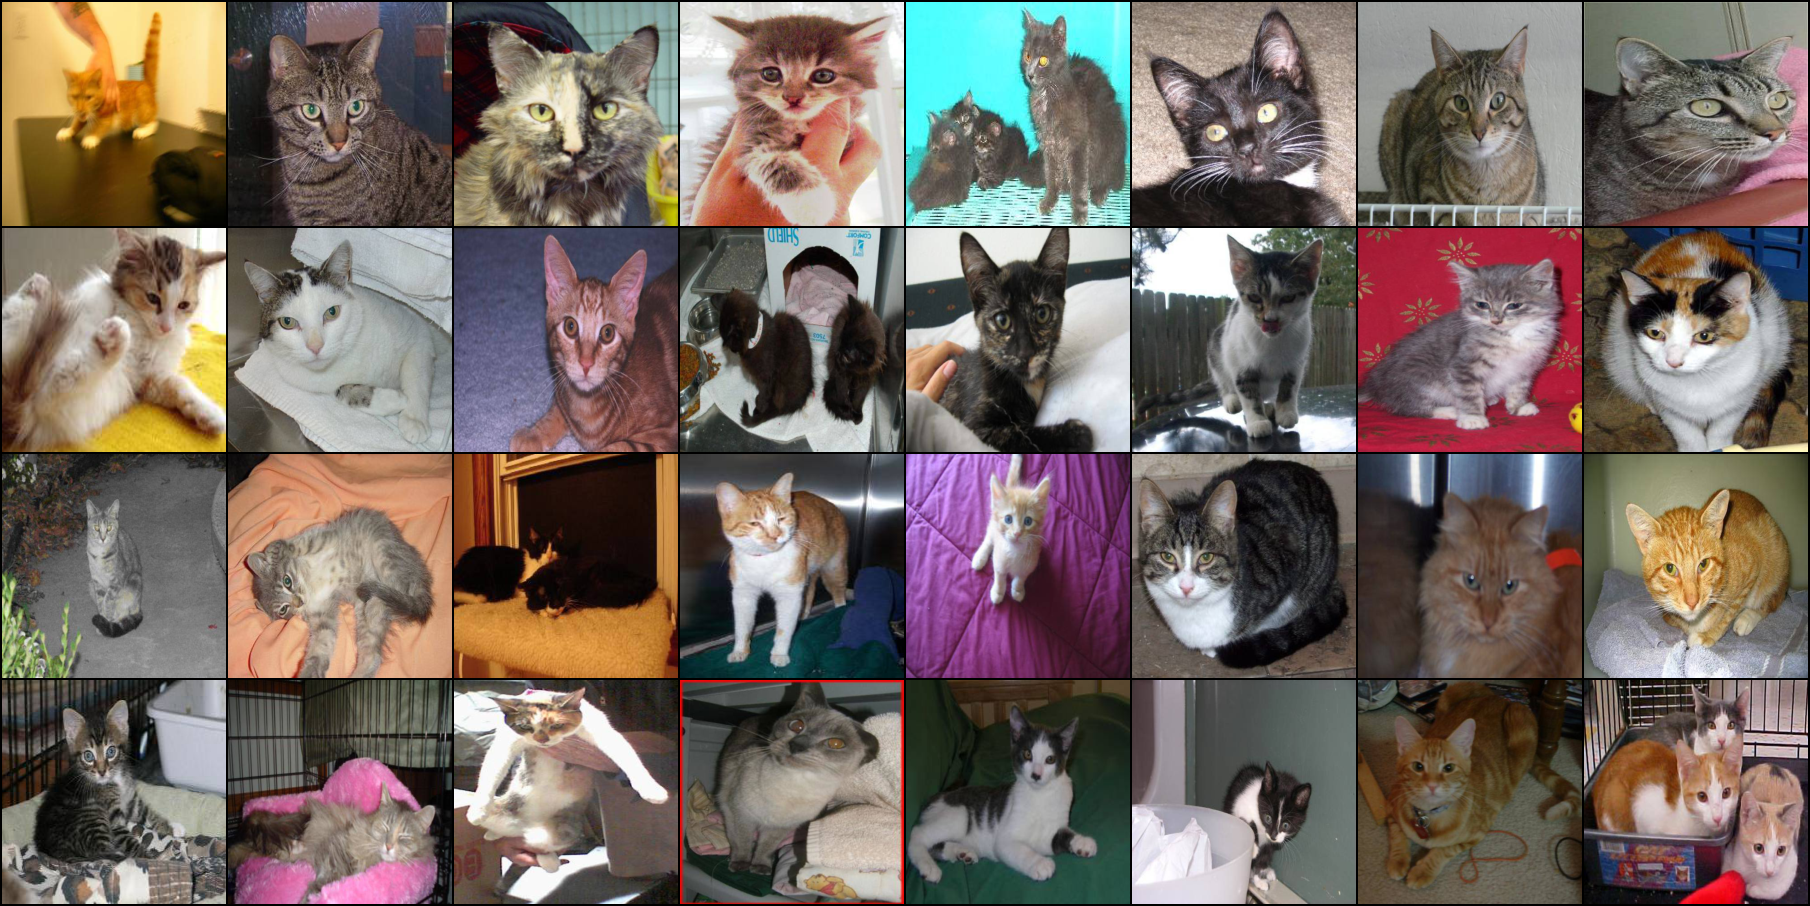

In [38]:
to_pil = v2.ToPILImage()

for X_train, y_label in data_loader:
    grid_images = make_grid(X_train, nrow=8)
    pil_grid_images = to_pil(grid_images)
    break

pil_grid_images

In [40]:
url = 'https://raw.githubusercontent.com/pytorch/vision/main/gallery/assets/astronaut.jpg'
response = requests.get(url)
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

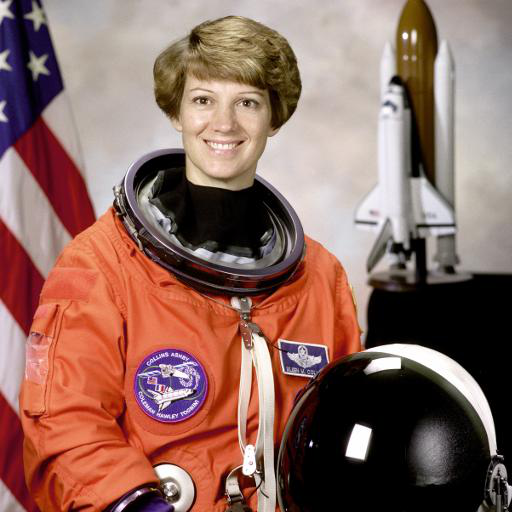

In [41]:
img = Image.open(io.BytesIO(response.content))
img